# Admission Predictor

.

## Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression 

## Get the Data

In [2]:
UCLA_data = pd.read_csv("UCLA_data.csv")

In [3]:
UCLA_data.head(2)

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76


In [4]:
UCLA_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
Serial No.           500 non-null int64
GRE Score            500 non-null int64
TOEFL Score          500 non-null int64
University Rating    500 non-null int64
SOP                  500 non-null float64
LOR                  500 non-null float64
CGPA                 500 non-null float64
Research             500 non-null int64
Chance of Admit      500 non-null float64
dtypes: float64(4), int64(5)
memory usage: 35.2 KB


In [5]:
UCLA_data.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


#### Clearing the Data

In [6]:
data = pd.DataFrame(UCLA_data)
data.columns = data.columns.str.strip().str.lower().str.replace(' ', '_')

In [7]:
data.head(2)

,serial_no.,gre_score,toefl_score,university_rating,sop,lor,cgpa,research,chance_of_admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76


In [8]:
data['chance_of_admit']=data["chance_of_admit"]*100
del data["serial_no."]

In [9]:
data.head(2)

,gre_score,toefl_score,university_rating,sop,lor,cgpa,research,chance_of_admit
0,337,118,4,4.5,4.5,9.65,1,92.0
1,324,107,4,4.0,4.5,8.87,1,76.0


In [10]:
data.columns

Index(['gre_score', 'toefl_score', 'university_rating', 'sop', 'lor', 'cgpa',
       'research', 'chance_of_admit'],
      dtype='object')

In [11]:
print('Data Show Is NULL')
data.isnull().sum()

Data Show Is NULL


gre_score            0
toefl_score          0
university_rating    0
sop                  0
lor                  0
cgpa                 0
research             0
chance_of_admit      0
dtype: int64

## EDA

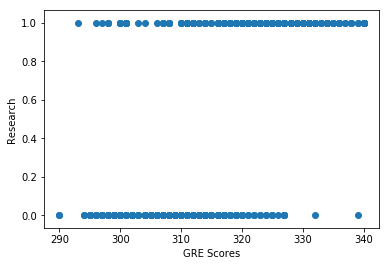

In [12]:
x=data["gre_score"]
y=data["research"]
plt.xlabel("GRE Scores")
plt.ylabel("Research")
plt.scatter(x,y)

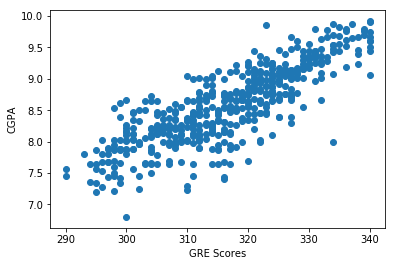

In [13]:
x=data["gre_score"]
y=data["cgpa"]
plt.xlabel("GRE Scores")
plt.ylabel("CGPA")
plt.scatter(x,y)

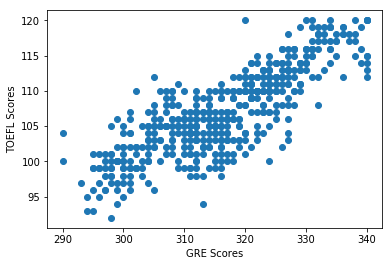

In [14]:
x=data["gre_score"]
y=data["toefl_score"]
plt.xlabel("GRE Scores")
plt.ylabel("TOEFL Scores")
plt.scatter(x,y)

<BarContainer object of 500 artists>

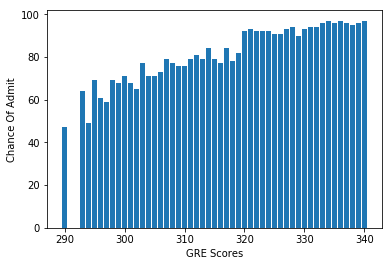

In [15]:
x=data["gre_score"]
y=data["chance_of_admit"]
plt.xlabel("GRE Scores")
plt.ylabel("Chance Of Admit")
plt.bar(x,y)

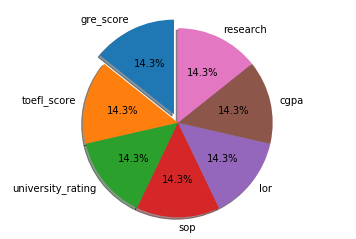

In [16]:
labels = 'gre_score', 'toefl_score', 'university_rating', 'sop', 'lor', 'cgpa','research'
sizes = [10,10,10,10,10,10,10]
explode = (0.1, 0, 0, 0, 0, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

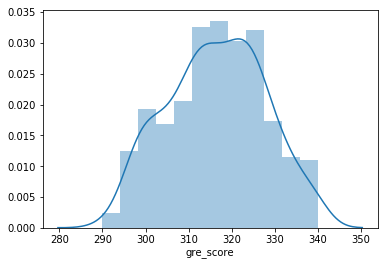

In [17]:
sns.distplot(x);

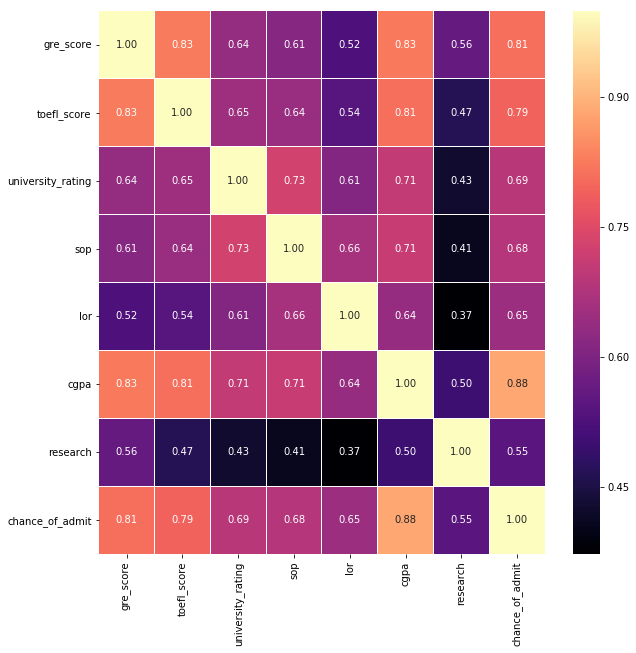

In [18]:
fig,ax = plt.subplots(figsize=(10, 10))
sns.heatmap(data.corr(), ax=ax, annot=True, linewidths=0.05, fmt= '.2f',cmap="magma")
plt.show()

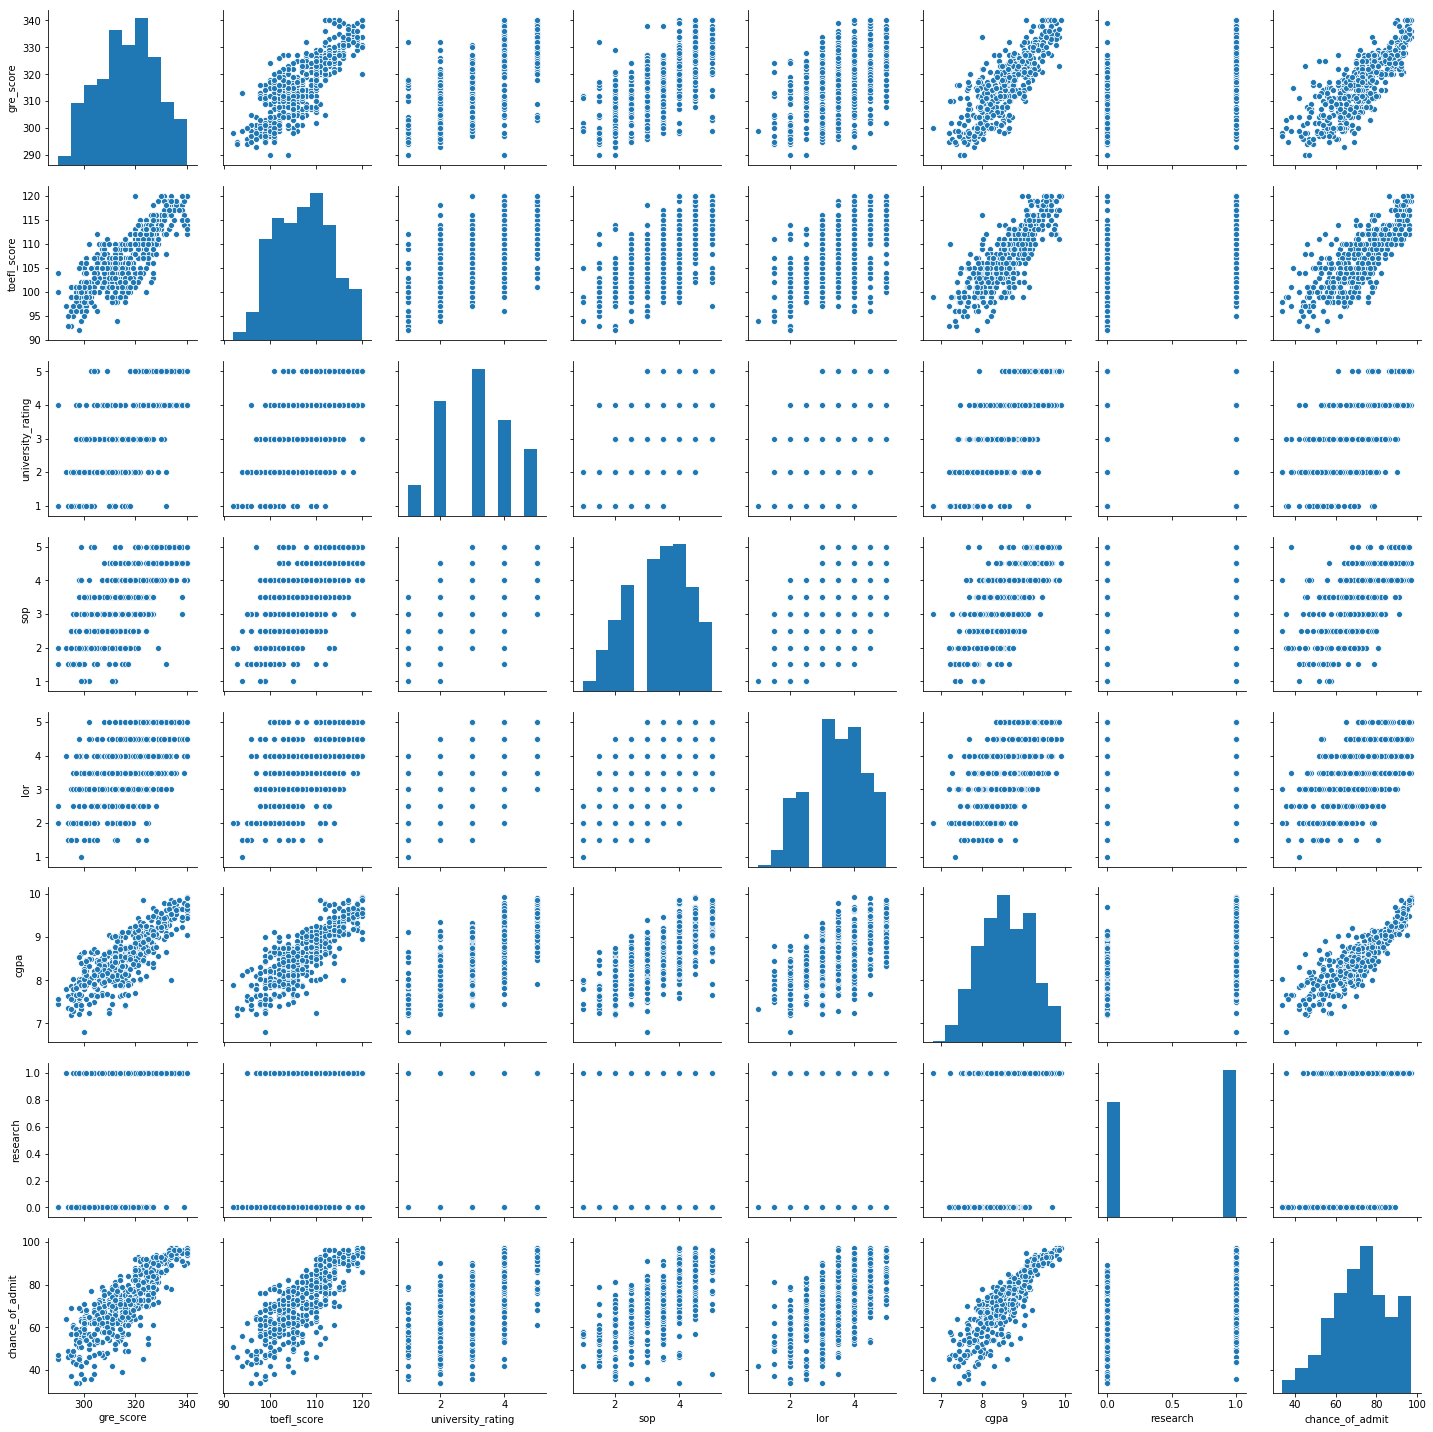

In [19]:
grid = sns.pairplot(data)
grid

In [20]:
grid.savefig('PairPlot.png')

In [21]:
grid.savefig('PairPlot.pdf')

In [22]:
high = pd.DataFrame(data[data['chance_of_admit'] > 90])

In [23]:
high.head()

,gre_score,toefl_score,university_rating,sop,lor,cgpa,research,chance_of_admit
0,337,118,4,4.5,4.5,9.65,1,92.0
22,328,116,5,5.0,5.0,9.50,1,94.0
23,334,119,5,5.0,4.5,9.70,1,95.0
24,336,119,5,4.0,3.5,9.80,1,97.0
25,340,120,5,4.5,4.5,9.60,1,94.0


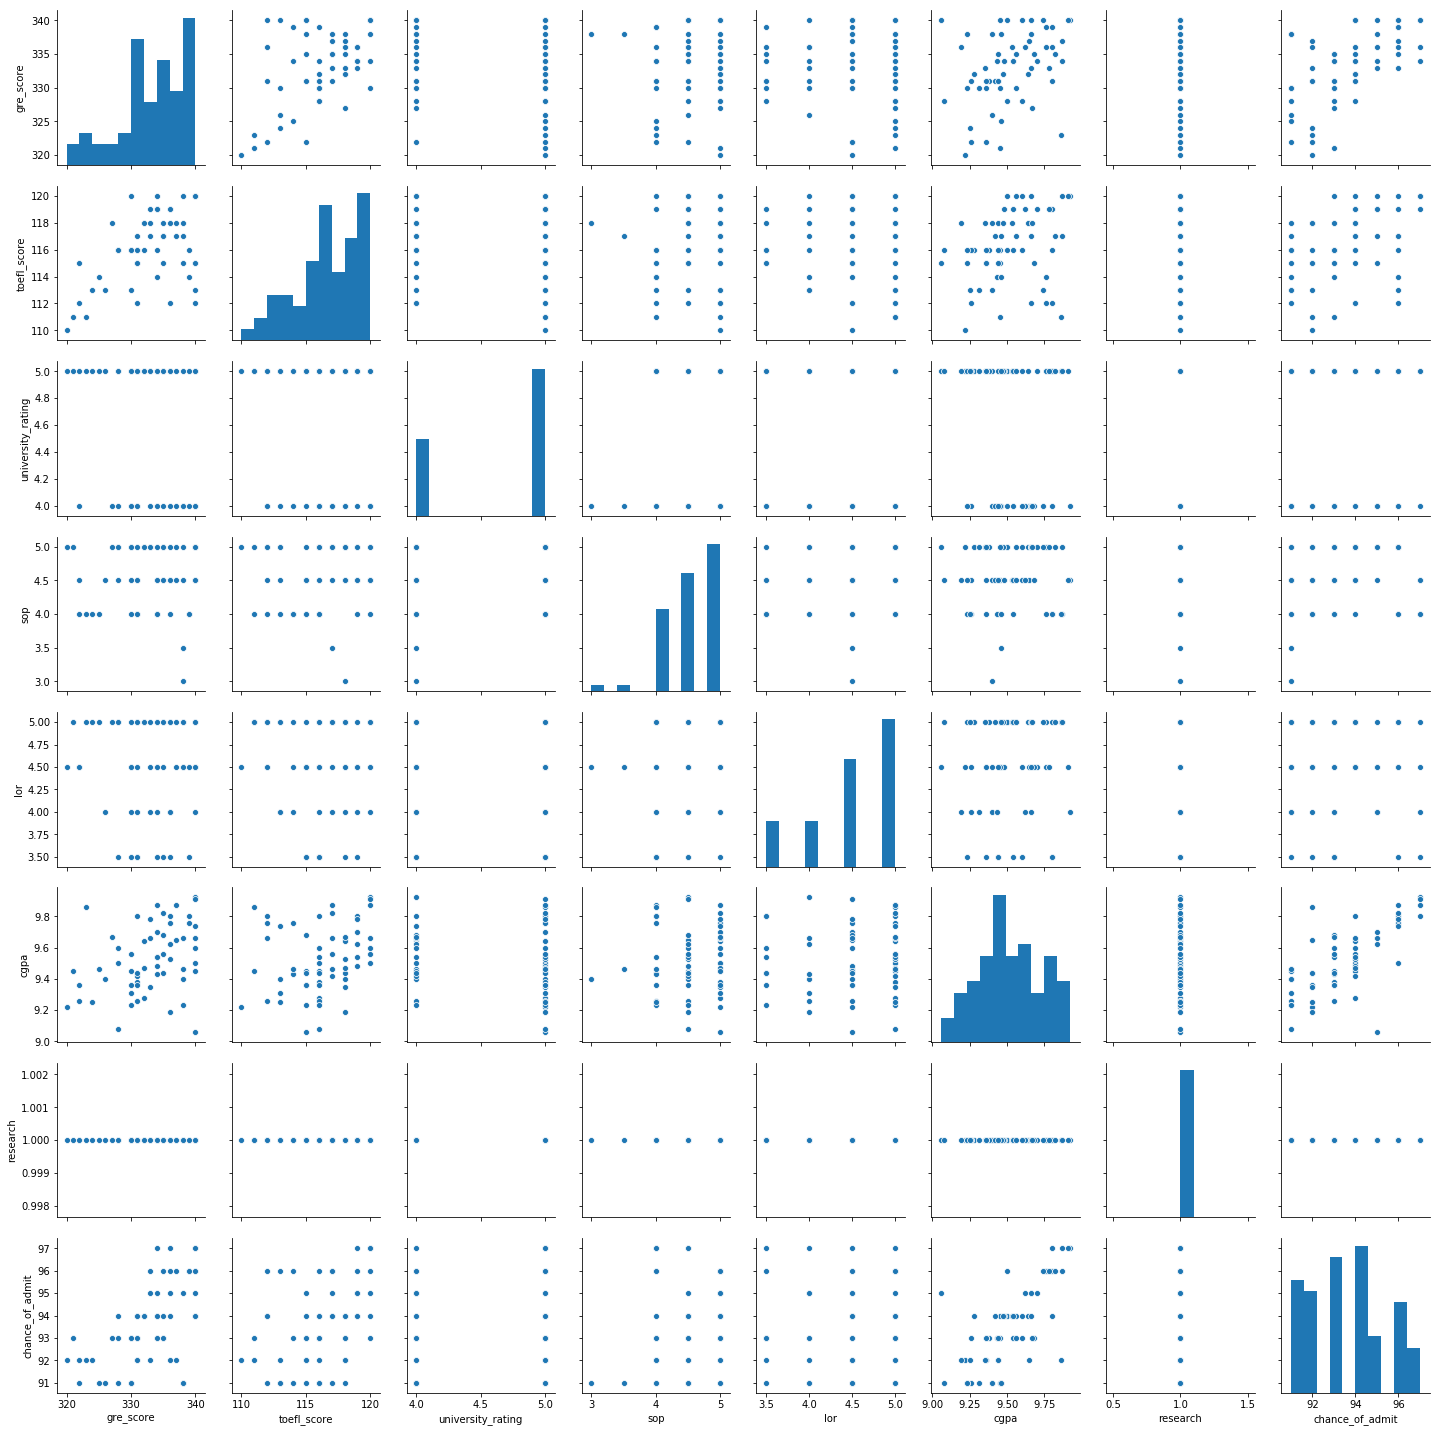

In [24]:
sns.pairplot(high)

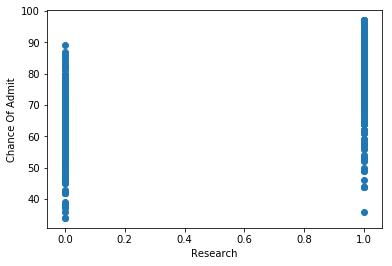

In [25]:
x=data["research"]
y=data["chance_of_admit"]
plt.xlabel("Research")
plt.ylabel("Chance Of Admit")
plt.scatter(x,y)

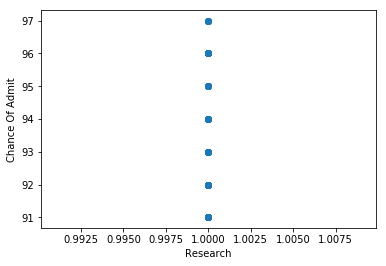

In [26]:
x=high["research"]
y=high["chance_of_admit"]
plt.xlabel("Research")
plt.ylabel("Chance Of Admit")
plt.scatter(x,y)

Not Having Research: 220
Having Research: 280


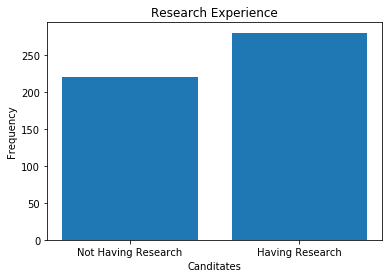

In [27]:
print("Not Having Research:",len(data[data.research == 0]))
print("Having Research:",len(data[data.research == 1]))
y = np.array([len(data[data.research == 0]),len(data[data.research == 1])])
x = ["Not Having Research","Having Research"]
plt.bar(x,y)
plt.title("Research Experience")
plt.xlabel("Canditates")
plt.ylabel("Frequency")
plt.show()

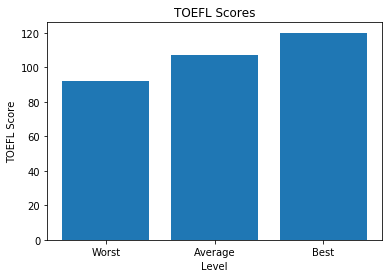

In [28]:
y = np.array([data["toefl_score"].min(),data["toefl_score"].mean(),data["toefl_score"].max()])
x = ["Worst","Average","Best"]
plt.bar(x,y)
plt.title("TOEFL Scores")
plt.xlabel("Level")
plt.ylabel("TOEFL Score")
plt.show()

## Regresion

In [29]:
x = data[['gre_score', 'toefl_score', 'university_rating', 'sop', 'lor', 'cgpa','research']]
y = data[['chance_of_admit']]

In [30]:
x.head(2)

,gre_score,toefl_score,university_rating,sop,lor,cgpa,research
0,337,118,4,4.5,4.5,9.65,1
1,324,107,4,4.0,4.5,8.87,1


In [31]:
y.head(2)

,chance_of_admit
0,92.0
1,76.0


In [32]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

reg=LinearRegression()

In [33]:
reg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [34]:
reg.score(X_train,y_train)

0.8185898878477812

In [35]:
pdt = reg.predict(X_test)
predicted = pd.DataFrame(pdt, columns = ["chance_of_admit"])
predicted
X_test.head(5)

,gre_score,toefl_score,university_rating,sop,lor,cgpa,research
180,300,104,3,3.5,3.0,8.16,0
119,327,104,5,3.0,3.5,8.84,1
461,301,102,3,2.5,2.0,8.13,1
286,336,118,5,4.5,4.0,9.19,1
133,323,112,5,4.0,4.5,8.78,0


In [36]:
pdt_custom = reg.predict([[330,120,4,4,4,9,0]])
predicted = pd.DataFrame(pdt, columns = ["chance_of_admit"])
predicted
pdt_custom

array([[83.44817445]])

In [37]:
pdt[:5]

array([[61.15771909],
       [77.75807142],
       [60.64870695],
       [89.21656506],
       [78.47756215]])

In [38]:
actual = y_test
actual[:5]

,chance_of_admit
180,71.0
119,71.0
461,68.0
286,92.0
133,79.0


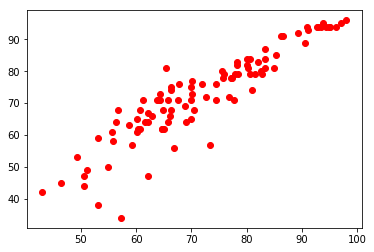

In [39]:
plt.scatter( predicted, actual, color='red')


In [40]:
reg.score(X_test, y_test)

0.8333730697509011

In [41]:
from sklearn.metrics import mean_squared_error
from math import sqrt

rms = sqrt(mean_squared_error(y_test,pdt))
rms

5.727578904815637

## Evaluation
 

In [43]:
import tkinter as tk
from tkinter import *
from tkinter import messagebox
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

def entry():
    window = tk.Tk()
    window.title("Admission Predictor")
    window.geometry('350x400')
    
    Label(window,text="MTech Admission Predictor", font='arial 14 bold').grid(row=0, columnspan=2)
    Label(window,text="").grid(row=1,column=0)
    Label(window,text="GRE Score").grid(row=2,column=0)
    Label(window,text="").grid(row=3,column=0)
    Label(window,text="TOEFEL Score").grid(row=4,column=0)
    Label(window,text="").grid(row=5,column=0)
    Label(window,text="University Rating").grid(row=6,column=0)
    Label(window,text="").grid(row=7,column=0)
    Label(window,text="SOP Strength").grid(row=8,column=0)
    Label(window,text="").grid(row=9,column=0)
    Label(window,text="LOR Strength").grid(row=10,column=0)
    Label(window,text="").grid(row=11,column=0)
    Label(window,text="CGPA").grid(row=12,column=0)
    Label(window,text="").grid(row=13,column=0)
    Label(window,text="Research Experience").grid(row=14,column=0)
    
    v1=IntVar()
    v2=IntVar()
    v3=IntVar()
    v4=IntVar()
    v5=IntVar()
    v6=IntVar()
    v7=IntVar()
    
    v1.set('')
    v2.set('')
    v3.set('')
    v4.set('')
    v5.set('')
    v6.set('')
    v7.set('')
    
    
    
    e1=Entry(window, textvariable=v1).grid(row=2,column=1)
    e2=Entry(window, textvariable=v2).grid(row=4,column=1)
    e3=Entry(window, textvariable=v3).grid(row=6,column=1)
    e4=Entry(window, textvariable=v4).grid(row=8,column=1)
    e5=Entry(window, textvariable=v5).grid(row=10,column=1)
    e6=Entry(window, textvariable=v6).grid(row=12,column=1)
    e7=Entry(window, textvariable=v7).grid(row=14,column=1)
    
    Label(window,text="").grid(row=15,column=0)
    
    
    def insert():
        newlist=[]
        gre_score=v1.get()
        toefl_score=v2.get()
        university_rating=v3.get()
        sop=v4.get()
        lor=v5.get()
        cgpa=v6.get()
        research=v7.get()
        
        newlist.append(gre_score)
        newlist.append(toefl_score)
        newlist.append(university_rating)
        newlist.append(sop)
        newlist.append(lor)
        newlist.append(cgpa)
        newlist.append(research)
        
        newlist_nn=[newlist]
        print(newlist_nn)
        
        
        pdt = reg.predict(newlist_nn)
        
        result = pdt.flatten()
        messagebox.showinfo("% Chance ", "Your Chance of Admission is %.2f %%" %(result) )
        
        print("Your Chance of Admission is %.2f %%" %(result) )
        print("\n")
        
        v1.set('')
        v2.set('')
        v3.set('')
        v4.set('')
        v5.set('')
        v6.set('')
        v7.set('')
        
        
    def clear():
        v1.set('')
        v2.set('')
        v3.set('')
        v4.set('')
        v5.set('')
        v6.set('')
        v7.set('')
        
    def close():
        window.destroy()
        
    Button(window, text="RESET", command=clear).grid(row=16,column=0)
    Button(window, text="SUBMIT", command=insert).grid(row=16,column=1)
    Button(window, text="EXIT", command=close).grid(row=16,column=2)
    
    window.mainloop()
    
entry()


